In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go

import plotly.express as px

# stats dependency
from scipy import stats
# feature_engineering dependency

import feature_engine

# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# get the shape of the data.
df.shape

(7043, 21)

# Exploratory Data Analysis
We started out with some descriptive analytics.

In [5]:
# get the columns name.

print(list(df.columns))

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [6]:
# inforamtion on the columns of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# total charge is a object type datatype so convert it into float.

In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# checking for any missing data in the dataset
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Data has 11 missing values. Hence, we discard them before we proceed with our EDA.

In [10]:
df.dropna(inplace=True)

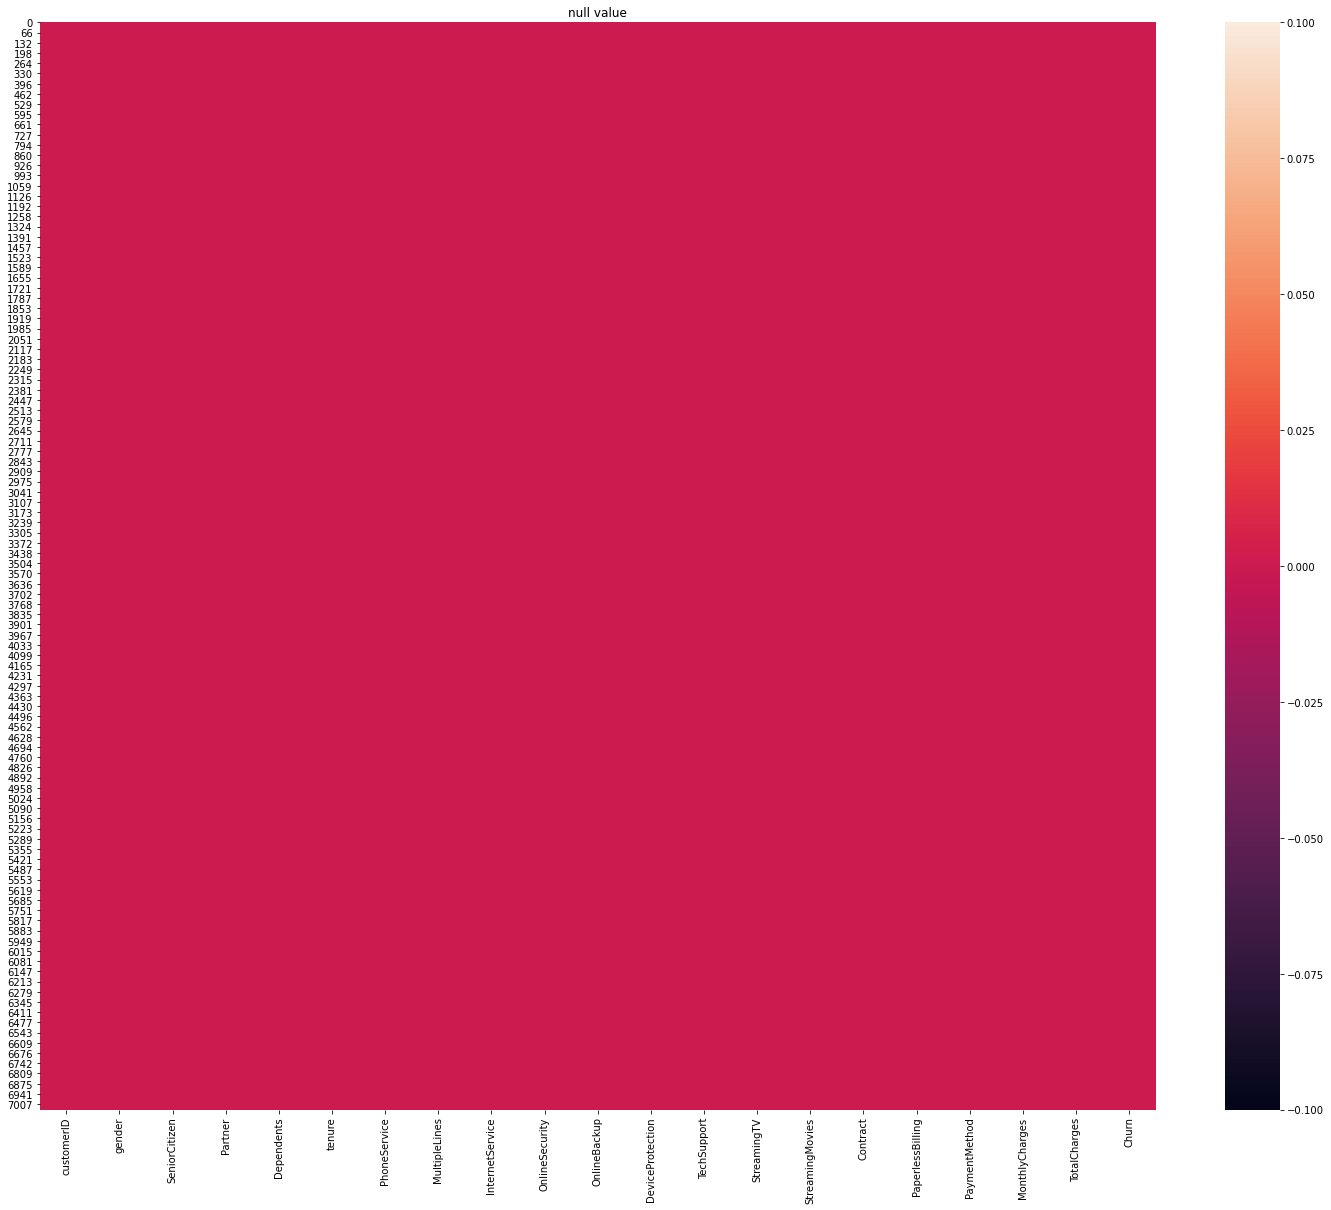

In [11]:
plt.figure(figsize=[25,20])
sns.heatmap(df.isnull())
plt.title('null value')
plt.show()

In [12]:
# checking for any highly correlated features in the dataset.
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

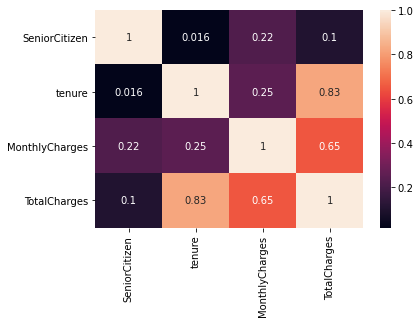

In [13]:
# plotting the correlation heatmap
sns.heatmap(df.corr(),annot=True)

* Initial infereneces:
    * There are more than 7000 samples in this datset.
    * This datset has 20 features.
    * Out of these 20 feautres 3 are numerical and the rest are categorical
    * This is no missing data in this dataset, though there is a high change of dirty data.
    * There are no highly correlated features in the dataset.

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


# Analysis and Visualization

# Univariate Analysis.

In [16]:
# gender

In [17]:
df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

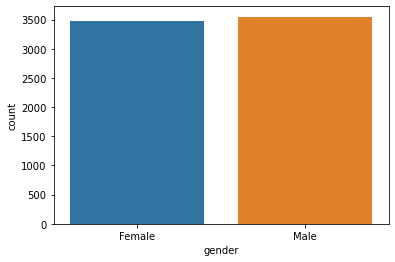

In [18]:
sns.countplot(df.gender)

In [19]:
from collections import Counter

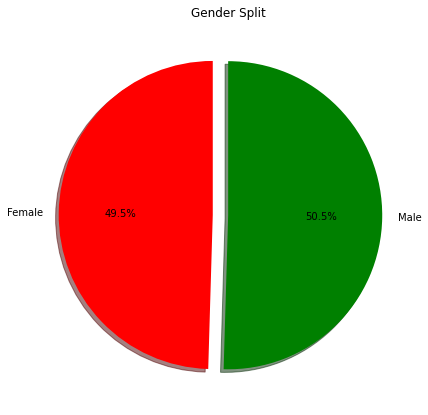

In [20]:
labels, values = zip(*Counter(df["gender"]).items())
colors = ['Red', 'Green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

*  No is no bias in the gender feature.Both of the genders are 50 percent in capacity in this dataset.

In [21]:
# Senior-Citizen

In [22]:
df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

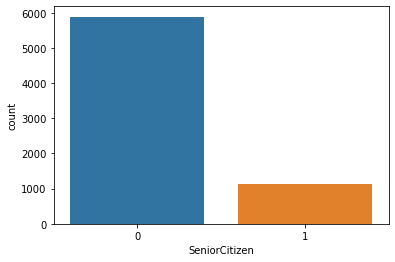

In [23]:
sns.countplot(df.SeniorCitizen)

In [24]:
df.SeniorCitizen.value_counts()/len(df)*100

0    83.759954
1    16.240046
Name: SeniorCitizen, dtype: float64

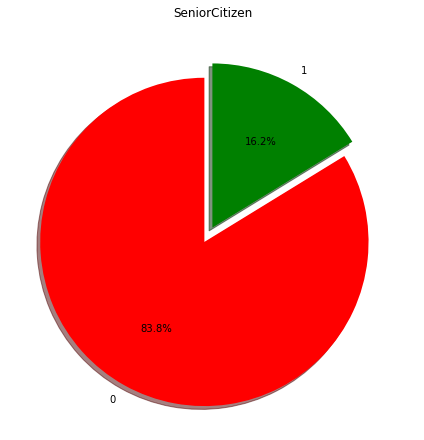

In [25]:
labels, values = zip(*Counter(df["SeniorCitizen"]).items())
colors = ['Red', 'Green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("SeniorCitizen")
plt.show()

* Senior City is a binary feature. (Yes or No)
* Most of the people are not senior citizens.
* 16 percnet of the total sample are Senior Citizens.

In [26]:
# Partner

In [27]:
df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

* This variable shows you have taking the telecom connection individually or in a partnership.

<AxesSubplot:xlabel='Partner', ylabel='count'>

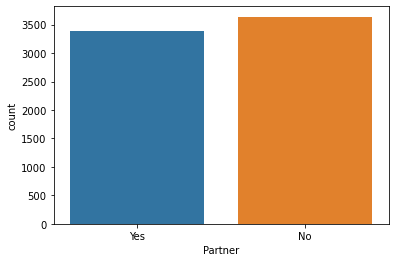

In [28]:
sns.countplot(df.Partner)

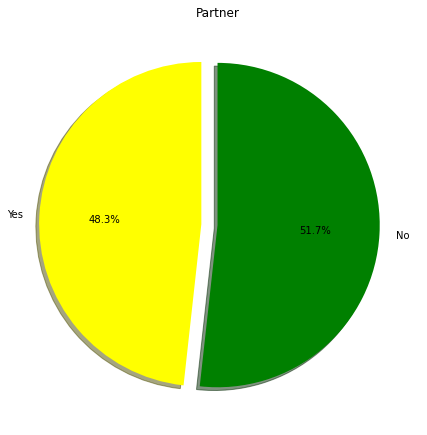

In [29]:
labels, values = zip(*Counter(df["Partner"]).items())
colors = ['yellow', 'Green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Partner")
plt.show()

* This variable shows you have taking the telecom connection individually or in a partnership.

In [30]:
# Dependent

In [31]:
df.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

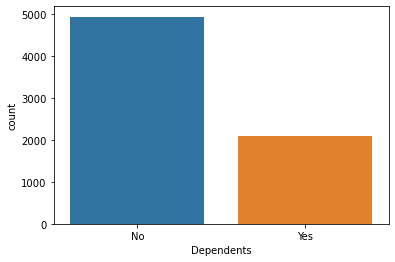

In [32]:
sns.countplot(df.Dependents)

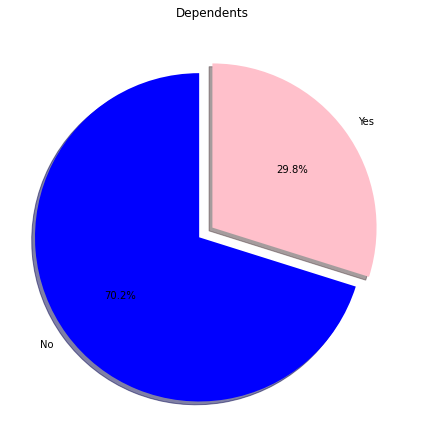

In [33]:
labels, values = zip(*Counter(df["Dependents"]).items())
colors = ['blue', 'pink']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Dependents")
plt.show()

* Most of the customers are independent.
* The dependency of a customer is mainly as the customer is minor od dependent on another individual from paying the bills.

In [34]:
# tenure 

* Tenure is the total months from which the customers has availed the service.

In [35]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:xlabel='tenure'>

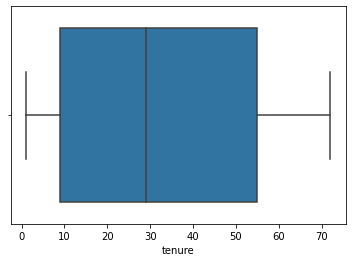

In [36]:
sns.boxplot(df.tenure)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

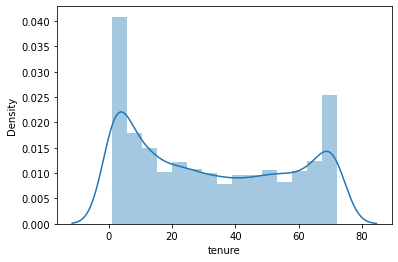

In [37]:
sns.distplot(df.tenure)

In [38]:
df.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [39]:
# phone service

In [40]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

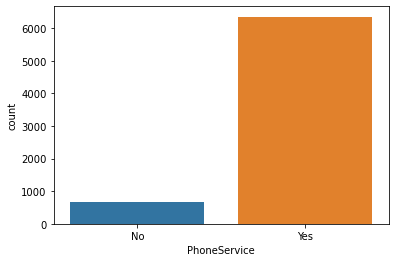

In [41]:
sns.countplot(df.PhoneService)

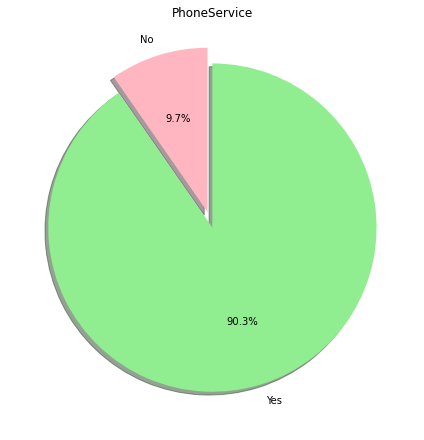

In [42]:
labels, values = zip(*Counter(df["PhoneService"]).items())
colors = ['lightpink', 'lightgreen']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("PhoneService")
plt.show()


In [43]:
df[df.PhoneService == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No


In [44]:
# multiline

In [45]:
df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

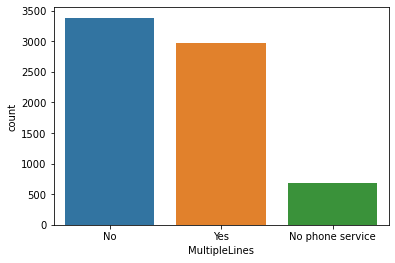

In [46]:
sns.countplot(df.MultipleLines,order = df.MultipleLines.value_counts().index)

In [47]:
df[df.MultipleLines == 'No phone service']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No


 * Customers equally use the multiline are single line phone services.

In [48]:
# internet servies

In [49]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [50]:
df.InternetService.value_counts()/len(df) * 100

Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: InternetService, dtype: float64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

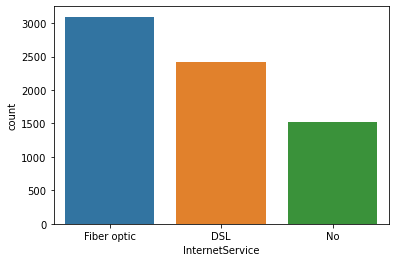

In [51]:
sns.countplot(df.InternetService,order=df.InternetService.value_counts().index)

([<matplotlib.patches.Wedge at 0x203c77b0a00>,
 [Text(0.2070578891820523, 1.090516863935388, 'Fiber optic'),
  Text(-0.8384221282071073, -0.7120732651438791, 'DSL'),
  Text(0.9337885209897026, -0.7536836193442605, 'No')],
 [Text(0.1137885697306774, 0.5992930513518797, '44.0%'),
  Text(-0.4573211608402402, -0.38840359916938855, '34.4%'),
  Text(0.5447099705773264, -0.4396487779508186, '21.6%')])

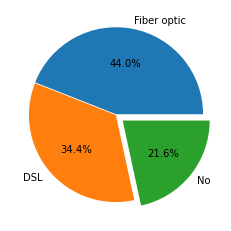

In [52]:
plt.pie(df.InternetService.value_counts()/len(df) * 100,labels=['Fiber optic','DSL','No'],autopct="%1.1f%%",explode=(0.01,0,0.1))

* Most of the customers have opted for Fibre Optic as it is the fasted and highest bandwidth connumication meduim.
* Fibre optic being able to have a very high speed, the cost for the fibre optics is high, thus many of the custmers also prefer DSL i.e., Digital Subscriber Line.
* Yet 31 percent of the customers prefer not hing any internet connection.

In [53]:
# 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'

* There above are the services on can avail only if they had availed the internet service.

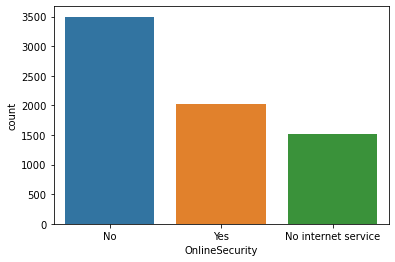

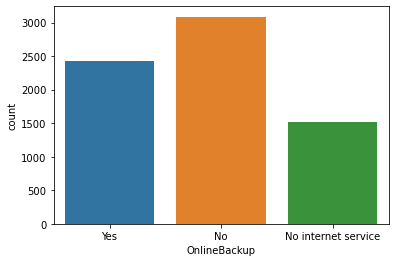

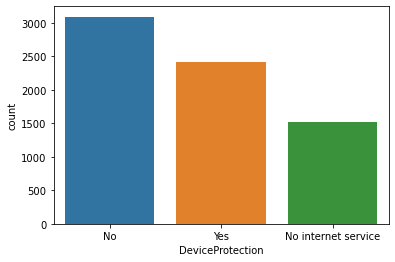

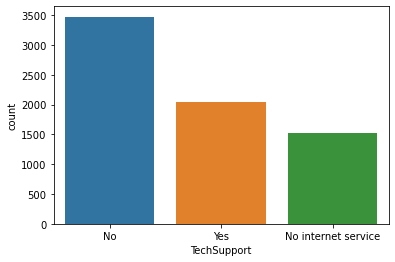

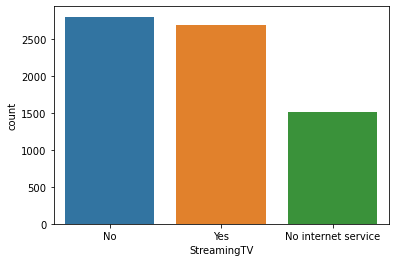

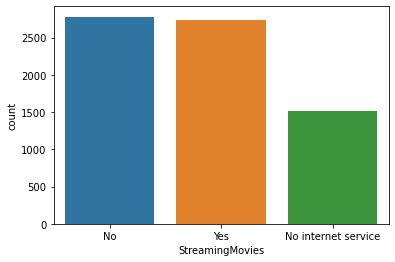

In [54]:
for service in  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies':
    plt.figure()
    sns.countplot(df[service],hue_order={'Yes':'r','No':'blue','No internet service':'green'})
    sns.countplot(df[service])

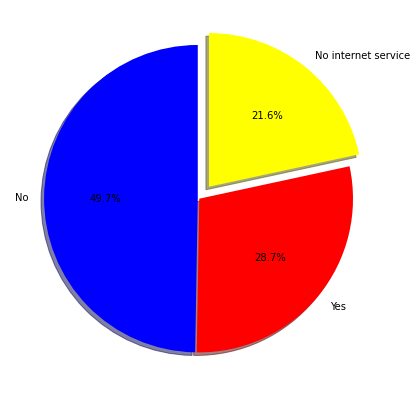

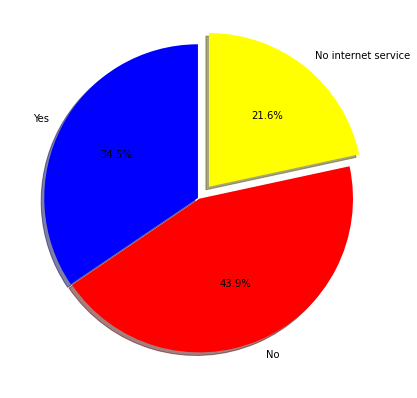

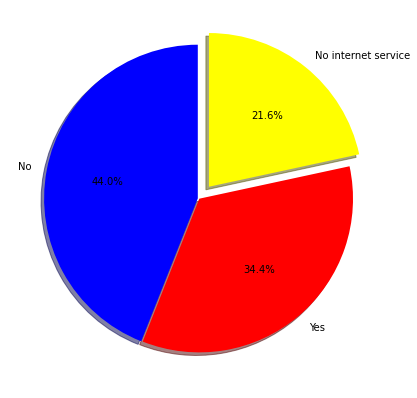

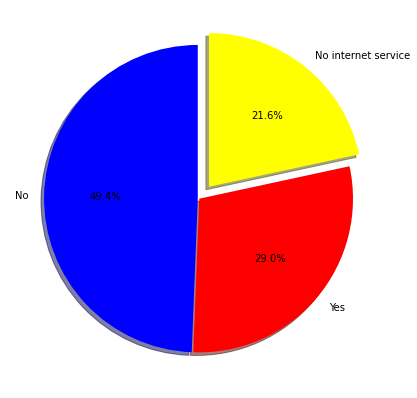

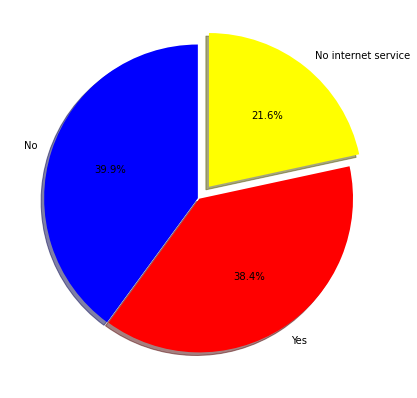

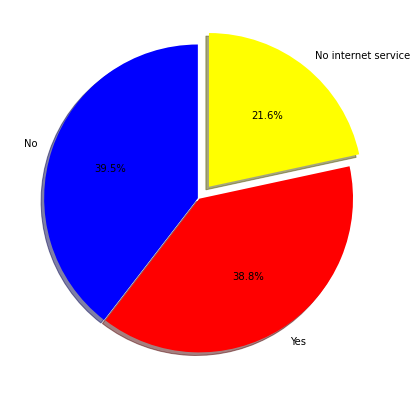

In [55]:
for service in  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies':
    
    labels, values = zip(*Counter(df[service]).items())
    colors = ['blue', 'red','yellow']
    piechart_df = (pd.DataFrame(list(values),list(labels)))
    piechart_df = piechart_df.reset_index()

    fig = plt.figure(figsize=[6, 6])

    plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.01,0,0.1),autopct="%1.1f%%", shadow=True, colors=colors)
    plt.tight_layout()
    
       
plt.show()


In [56]:
# contract

In [57]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

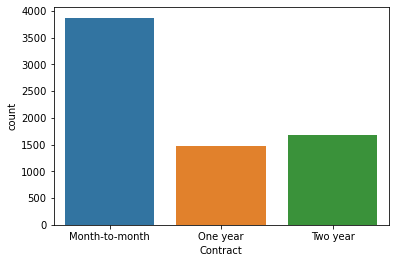

In [58]:
sns.countplot(df.Contract)

In [59]:
df.Contract.value_counts()/len(df) * 100

Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: Contract, dtype: float64

Text(0.5, 1.0, 'Contract')

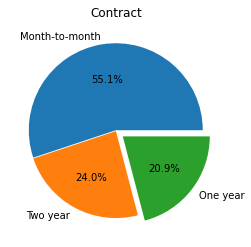

In [60]:
plt.pie(df.Contract.value_counts()/len(df) * 100,labels=['Month-to-month','Two year','One year'],autopct="%1.1f%%",explode=(0.01,0,0.1))
plt.title("Contract")

* Customers mostly prefer the month to month contract.

In [61]:
# payments mathod

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

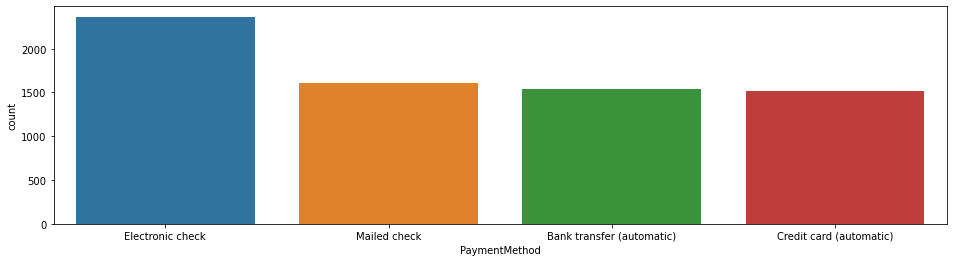

In [62]:
plt.figure(figsize=(16,4))
sns.countplot(df.PaymentMethod)

In [63]:
df.PaymentMethod.value_counts()/len(df) * 100

Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: PaymentMethod, dtype: float64

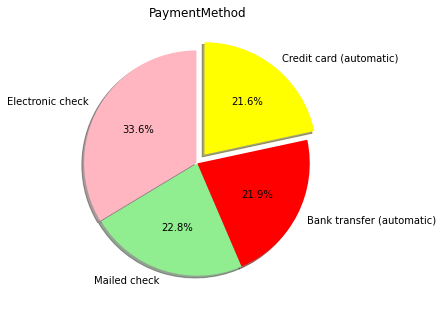

In [64]:
labels, values = zip(*Counter(df["PaymentMethod"]).items())
colors = ['lightpink', 'lightgreen','red','yellow']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.01,0,0,0.1),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("PaymentMethod")
plt.show()

* Electrnic Check is preferreed mostly by the customers.|

In [65]:
# monthly charges and total monthly charges.

In [66]:
df.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

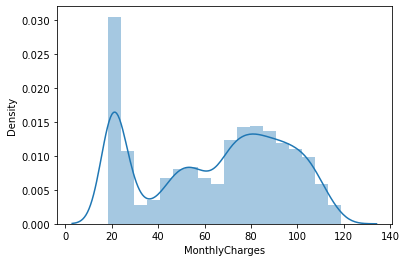

In [67]:
sns.distplot(df.MonthlyCharges)

<AxesSubplot:xlabel='MonthlyCharges'>

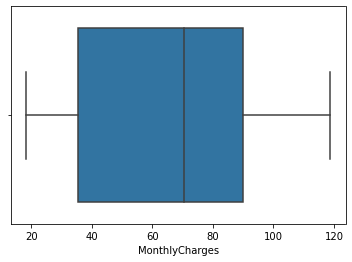

In [68]:
sns.boxplot(df.MonthlyCharges)

In [69]:
df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [70]:
# Total Monthly charges

In [71]:
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

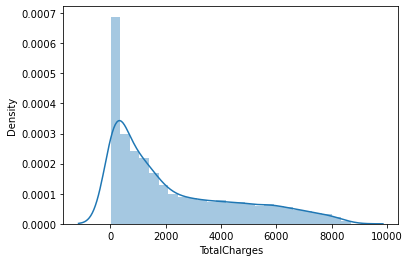

In [72]:
sns.distplot(df.TotalCharges)

<AxesSubplot:xlabel='TotalCharges'>

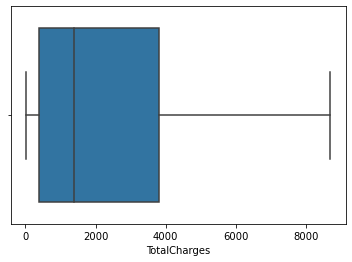

In [73]:
sns.boxplot(df.TotalCharges)

In [74]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

# Target Feature

* This is the target variable. 
* If churn is yes, then the customer might leave/stop the service and if no if otherwise.

In [75]:
# customer churn

In [76]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

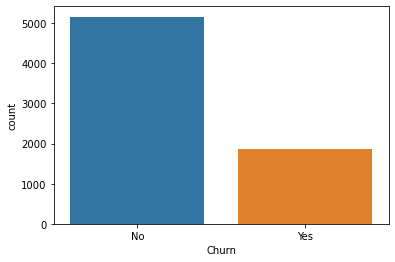

In [77]:
sns.countplot(df.Churn)

In [78]:
df.Churn.value_counts()/len(df) *100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

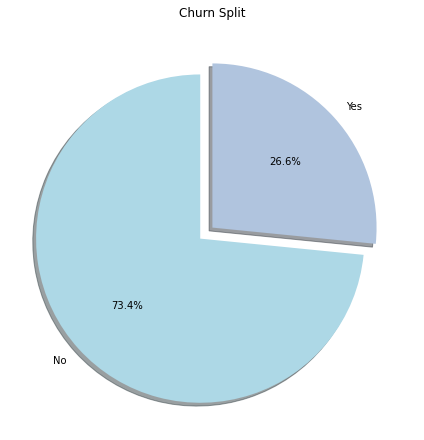

In [79]:
labels, values = zip(*Counter(df["Churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()


* This is the target variable. 
* If churn is yes, then the customer might leave/stop the service and if no if otherwise.

# Multivariate anaysis.

In [80]:
# internet service vs the monthly price

In [81]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

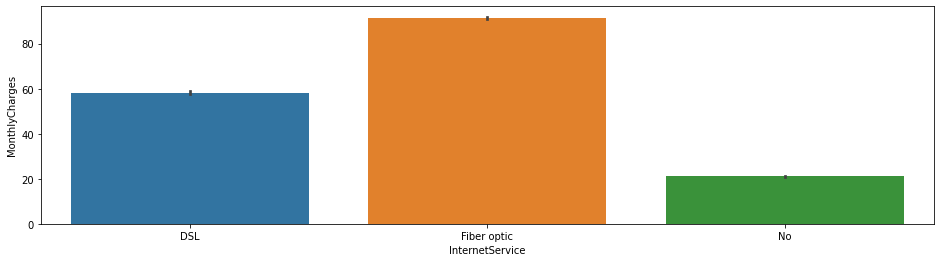

In [82]:
fig_this_size(16,4)
sns.barplot(df.InternetService,df.MonthlyCharges)

* Fibre poptics are costly than DSL 

<AxesSubplot:xlabel='tenure', ylabel='Density'>

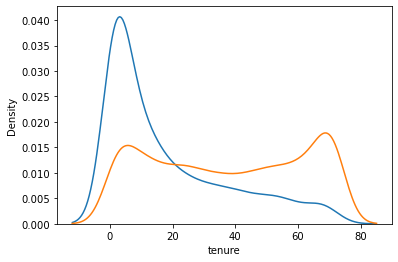

In [83]:
# tenure vs churn

sns.kdeplot(df[df.Churn == 'Yes']['tenure'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['tenure'],label='No')


* The customers with lower tenures tend to stop the services.
* The regular custmers are distributed uniformly.

In [84]:
# multiple lines vs monthly bills

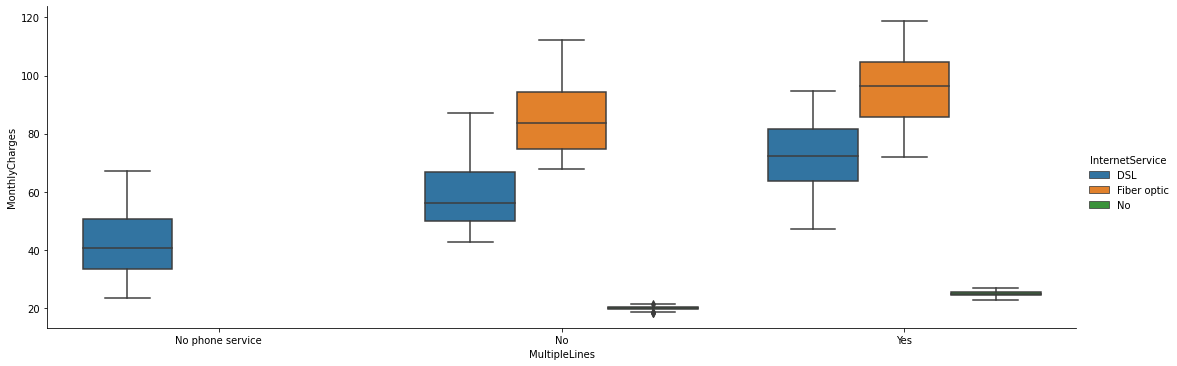

In [85]:
sns.catplot(x='MultipleLines',y='MonthlyCharges',data=df,kind='box',hue='InternetService',aspect=3)

In [86]:
# payment method vs tenure

<AxesSubplot:xlabel='PaymentMethod', ylabel='tenure'>

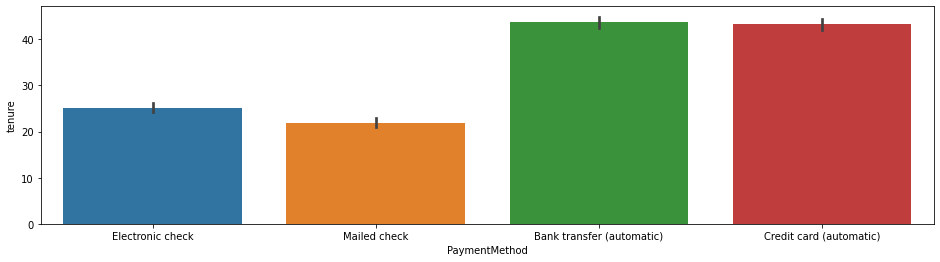

In [87]:
fig_this_size(16,4)
sns.barplot(df.PaymentMethod,df.tenure)

* The cutomers with high lenure are very likely to have automatic payment method (bank transfers and credit cards).

In [88]:
# Total charges vs chruns

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

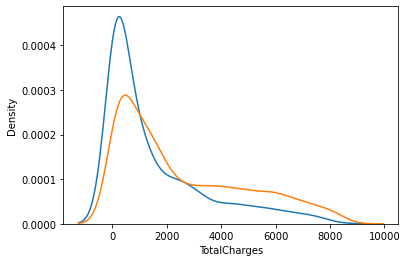

In [89]:
sns.kdeplot(df[df.Churn == 'Yes']['TotalCharges'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['TotalCharges'],label='No')

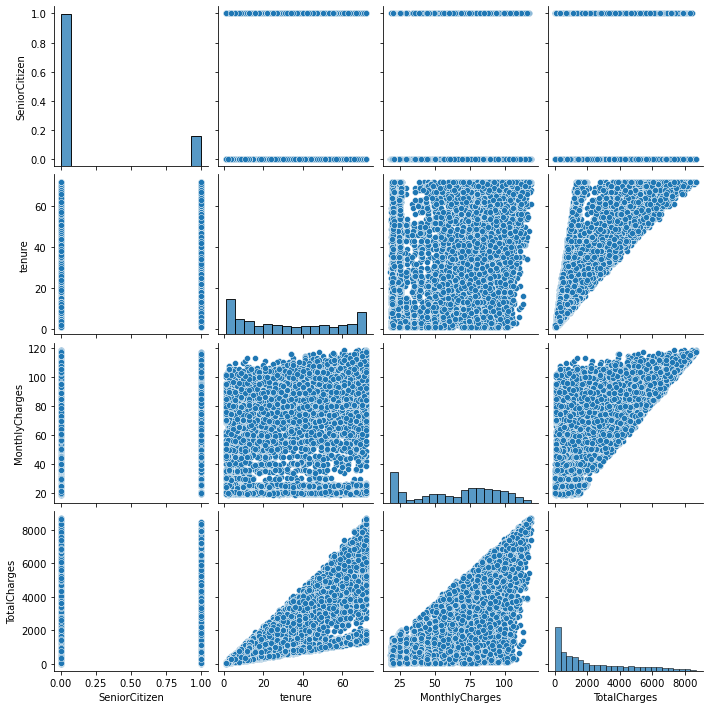

In [90]:
sns.pairplot(df)

In [91]:
df.drop(['customerID'],axis=1,inplace=True)

# Convert Categorical Features into Numerical .

In [92]:
categorical_cols = [c for c in df.columns if df[c].dtype == 'object'
                    or c == 'SeniorCitizen']
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col], _ = pd.factorize(df[col])
    else:
        df = pd.get_dummies(df, columns=[col],drop_first=True)

df=df

In [93]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,34,1,1,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,0,2,1,0,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,45,0,1,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,2,1,0,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [94]:
df.shape

(7032, 31)

#  Data Understanding




# Correlation with churn

* Contract monthly, absence of online security and tech support seem to be positively correlated with churn.
* Tenure, two year contracts and services such as Online security, Tech support, Online backup, Device protection seem to be negatively related to churn.
* 'gender','StreamingMovies_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes' seem to no difference


In [95]:
df.corr()['Churn'].sort_values(ascending = False)#Get Correlation of "Churn"

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
SeniorCitizen                            0.150541
Partner                                  0.149982
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                  -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270
Contract_One year                       -0.178225


# 2 Correlation matrix check: 'TotalCharges', 'tenure' ; 'MultipleLines_Yes', 'MultipleLines_No' are highly correlated

In [96]:
correlated_features = set()  
correlation_matrix = df.corr()

In [97]:
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [98]:
print(correlated_features)

{'MonthlyCharges', 'tenure', 'StreamingMovies_No internet service', 'TechSupport_No internet service', 'PhoneService', 'OnlineBackup_No internet service', 'StreamingTV_No internet service', 'TotalCharges', 'OnlineSecurity_No internet service', 'InternetService_No', 'DeviceProtection_No internet service', 'InternetService_Fiber optic', 'MultipleLines_No phone service'}


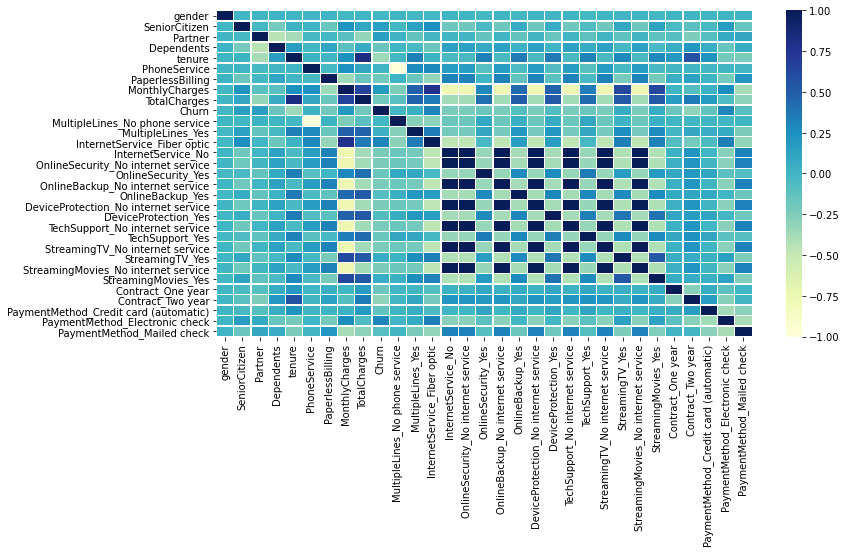

In [99]:
plt.figure(figsize=(12, 6)) 
#corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, 
                 linewidths=.2, cmap="YlGnBu")
#Get Correlatio

# X and Y split

In [100]:
X = df.drop(['Churn'],axis=1)
y = df[['Churn']]

In [101]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29.85,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,34,1,1,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,0,2,1,0,53.85,108.15,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,45,0,1,42.30,1840.75,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,2,1,0,70.70,151.65,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


# Train and Test Splits

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [105]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4922, 30), (4922, 1), (2110, 30), (2110, 1))

# Building the model

In [106]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [107]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [108]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))


In [109]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8065826899634295
Test_Acc: 0.7928909952606635
Recall: 0.7928909952606635
Precision: 0.7928909952606635
F1: 0.7928909952606635


In [110]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.7342543681430312
Test_Acc: 0.7341232227488151
Recall: 0.7341232227488151
Precision: 0.7341232227488151
F1: 0.7341232227488151


In [111]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.8293376676147908
Test_Acc: 0.771563981042654
Recall: 0.771563981042654
Precision: 0.771563981042654
F1: 0.771563981042654


In [112]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.9985778138967899
Test_Acc: 0.728909952606635
Recall: 0.728909952606635
Precision: 0.728909952606635
F1: 0.728909952606635


In [113]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.9985778138967899
Test_Acc: 0.7796208530805687
Recall: 0.7796208530805687
Precision: 0.7796208530805687
F1: 0.7796208530805687


In [114]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.8277123120682649
Test_Acc: 0.8
Recall: 0.8
Precision: 0.8
F1: 0.8


In [115]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.8065826899634295
Test_Acc: 0.7971563981042654
Recall: 0.7971563981042654
Precision: 0.7971563981042654
F1: 0.7971563981042654


In [116]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [117]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.806583,0.792891,0.792891,0.792891,0.792891,0.806585
1,SVC,0.734254,0.734123,0.734123,0.734123,0.734123,0.734254
2,KNN,0.829338,0.771564,0.771564,0.771564,0.771564,0.766156
3,Random_forest,0.998578,0.731754,0.731754,0.731754,0.731754,0.724910
4,Decision_Treee,0.998578,0.779621,0.779621,0.779621,0.779621,0.794597
5,Gradient_boost,0.839090,0.796682,0.796682,0.796682,0.796682,0.800897
6,Adaboost,0.998578,0.782938,0.782938,0.782938,0.782938,0.793988


 *  We have Logistic Regression as the winner beating Gradient Boost with a margin of  0.005%.

In [118]:
# best model

In [119]:
best_model = LogisticRegression()
best_model.fit(X_train,y_train)

LogisticRegression()

In [120]:
y_preds = best_model.predict(X_test)
train_n_ret_scores(LogisticRegression())
print(classification_report(y_test,y_preds))

Train_Acc: 0.8065826899634295
Test_Acc: 0.7928909952606635
Recall: 0.7928909952606635
Precision: 0.7928909952606635
F1: 0.7928909952606635
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



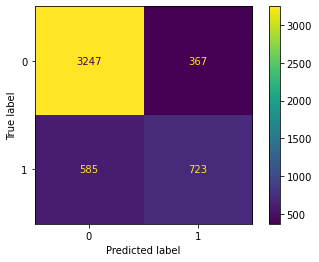

In [121]:
plot_confusion_matrix(best_model,X_train,y_train)

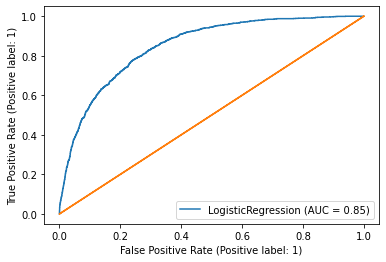

In [122]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_train,y_train)

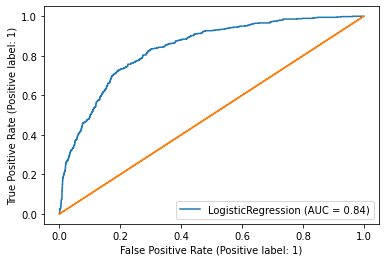

In [123]:
plot_roc_curve(best_model,X_test,y_test)
plt.plot(y_test,y_test)

# # Hyperparameter Tuning
Choose following method for hyperparameter tuning

RandomizedSearchCV > Fast but might skip some important parameters, computationally Less than grid
searchcv

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [124]:
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-3,6, 12)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Fit it to the data
best_model = logreg_cv.fit(X_train, y_train)

#examine the best model
print(best_model.best_score_)
print(best_model.best_params_)
print(best_model.best_estimator_)

0.8075970085258662
{'C': 151991.10829529332}
LogisticRegression(C=151991.10829529332)


# Fitting Logistic Regression with best parameters

In [125]:
best_lr1 = LogisticRegression(C=151991.108)
best_lr1.fit(X_train, y_train)

LogisticRegression(C=151991.108)

In [126]:
preds=best_lr1.predict(X_test)

In [127]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



# Save model

In [128]:
import pickle
best_lr1 = LogisticRegression(C=151991.108)
# open a file, where you ant to store the data
file = open('customer churn.pkl', 'wb')

# dump information to that file
pickle.dump(best_lr1, file)